# Introduction to Regression with Neural Networks with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)


2.5.0


## Creating data to view and fit

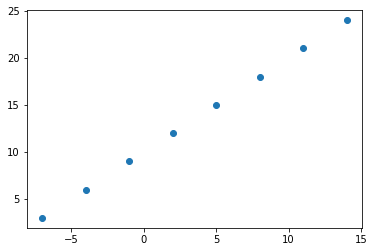

In [133]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#Visualize it

plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modellig with TF

1. Create a model - define input and output layers and hidden layers
2. Compile model - loss func, optimizer and evaluation metrics
3. Fitting a model - Let the model try to identify the patterns

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model

model.compile(loss= tf.keras.losses.mae #Mean absolute error
,optimizer = tf.keras.optimizers.SGD() # Stochastic gradient descent
, metrics=['mae']
)

# 3. Fit the model

model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
# Try to predict with the trained model

y_pred = model.predict([17.0]) #Expected 27
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model

1. Creating a model - add more layers, increase number of neurons, change activation functions
2. Compiling a model - change the optimization functions or the learning rate of the optimization function
3. Fitting a model - more epochs or give more data

In [10]:
# Rebuilding our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.optimizers.SGD(), metrics=['MAE'])

#3. Fit the model

model.fit(X,y,epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 146ms/step - loss: 11.2219 - MAE: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - MAE: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - MAE: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - MAE: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.6919 - MAE: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 10.5594 - MAE: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.4269 - MAE: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2944 - MAE: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - MAE: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - MAE: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2m

In [11]:
# Reminding the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
#Check if the prediction has improved

model.predict([17.0])# Expected 27 


array([[29.739855]], dtype=float32)

In [13]:
# Rebuilding our model with further changes

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.optimizers.SGD(), metrics=['MAE'])

#3. Fit the model

model.fit(X,y,epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 170ms/step - loss: 12.3193 - MAE: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.7804 - MAE: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2324 - MAE: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6601 - MAE: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0632 - MAE: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4503 - MAE: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7991 - MAE: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.1072 - MAE: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3691 - MAE: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.5758 - MAE: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - l

In [14]:
# Testing a new prediction

model.predict([17.0]) # Expected 27
#Signs of overfitting --> Better loss but worse performance with outside data

array([[31.22314]], dtype=float32)

## Evaluating a model

Typical workflow when working with neural networks

Build -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak ->...

When evaluating remeber:
> Visualize,Visualize,Visualize
* The data
* The model
* The training
* The predictions

In [15]:
# Make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [16]:
#Make labels for the dataset

y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

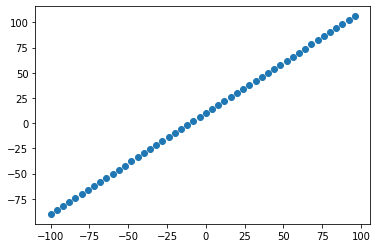

In [17]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...

* Training (70-80%) 
* Validate - used for tunning/tweaking (10-15%)
* Test - Evaluation/final testing (10-15%)

In [18]:
# Check the lenght of the samples

len(X)

50

In [19]:
#Because of the diminished value of samples validation set is going to be ignored for now
#Split the data into train and test

X_train = X[:40]#First 40 (80%)
X_test = X[40:]# Last 10 (20%)
y_train = y[:40]
y_test = y[40:]

len(X_test),len(y_test),len(X_train),len(y_train)

(10, 10, 40, 40)

## Visualizing the data after split

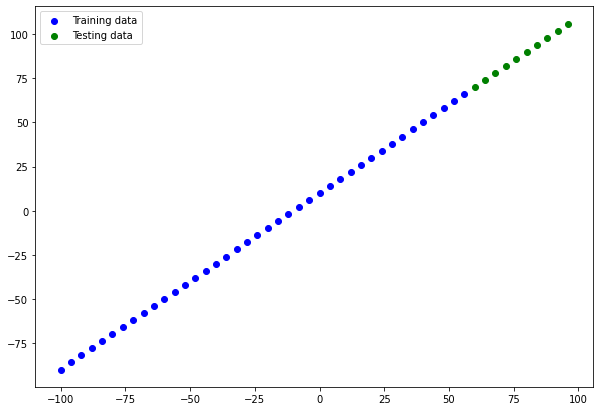

In [20]:
plt.figure(figsize=(10,7))
#Plot training in blue
plt.scatter(X_train,y_train,c='b',label = 'Training data')
plt.scatter(X_test,y_test,c='g',label = 'Testing data')
plt.legend()

In [21]:
#Building a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics=['mae'])

#model.fit(X_train,y_train,epochs=100)

In [22]:
X[0].shape

TensorShape([])

In [23]:
# Creating a model that builds automatically by defining the input_shape on the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

model.compile(loss = tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics=['mae'])

#model.fit(X_train,y_train,epochs=100)

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Every time we run fit without reinstatiate the model it adds epochs to the training
#Watch out with this to not cause overfitting
model.fit(X_train,y_train,epochs=100,verbose = 0) 

* Total params - number of parameters in the model
* Trainable params - parameters that the model can update as it trains
* Non-trainable params - frozen parameters trained previously (imported models generally)

In [26]:
from keras.utils.vis_utils import plot_model

plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Visualizing the model predictions 

Plot the predictions against the real values
> Model copied from video notebook

In [27]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100) 

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 98.0966 - mae: 98.0966
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 90.8758 - mae: 90.8758
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 84.5739 - mae: 84.5739
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 77.7671 - mae: 77.7671
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 70.9721 - mae: 70.9721
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 64.2779 - mae: 64.2779
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 57.1894 - mae: 57.1894
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 50.2534 - mae: 50.2534
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 43.6535 - mae: 43.6535
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 36.2484 - mae: 36.2484
Epoch 11/100
2/2 [==============================] - 0s 1ms/

In [28]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.23574 ],
       [ 74.26004 ],
       [ 78.28433 ],
       [ 82.30864 ],
       [ 86.33293 ],
       [ 90.35722 ],
       [ 94.381516],
       [ 98.405815],
       [102.430115],
       [106.45442 ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [30]:
# Creating plot function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

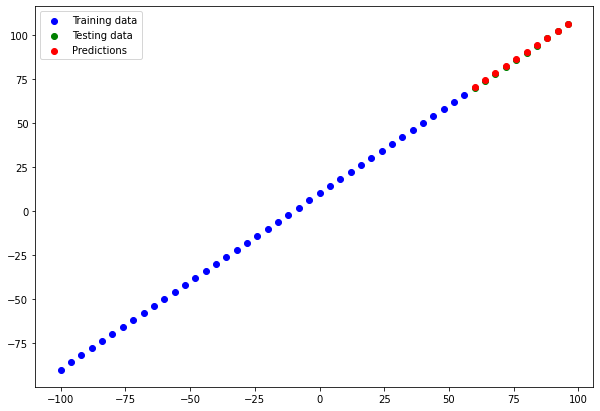

In [31]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

### Evaluation metrics

Depending on the problem there will be different metrics

- Regression -> MAE and MSE (mainly)
  -  MSE punishes more the bigger errors


In [32]:
#model.evaluate returns loss and metrics set while compiling the model
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 75ms/step - loss: 0.3451 - mae: 0.3451


[0.3450775146484375, 0.3450775146484375]

In [33]:
#These return a list, instead of a single value
MAE = tf.metrics.mean_absolute_error(y_test,y_pred)
MSE = tf.metrics.mean_squared_error(y_test,y_pred)

MAE,MSE

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([17.811407 , 14.643976 , 12.286267 , 10.738272 , 10.       ,
        10.0714445, 10.952606 , 12.643489 , 15.144092 , 18.454422 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([447.56894, 320.7865 , 226.3942 , 164.39159, 134.77911, 137.55649,
        172.72375, 240.281  , 340.22824, 472.56567], dtype=float32)>)

In [34]:
# Comparing different tensor must have same shape
#y_test -> (10,)
#y_pred -> (10,1)
y_test,tf.constant(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.23574 ],
        [ 74.26004 ],
        [ 78.28433 ],
        [ 82.30864 ],
        [ 86.33293 ],
        [ 90.35722 ],
        [ 94.381516],
        [ 98.405815],
        [102.430115],
        [106.45442 ]], dtype=float32)>)

In [35]:
#Adjusting y_pred
y_pred = tf.squeeze(tf.constant(y_pred))
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.23574 ,  74.26004 ,  78.28433 ,  82.30864 ,  86.33293 ,
        90.35722 ,  94.381516,  98.405815, 102.430115, 106.45442 ],
      dtype=float32)>

In [36]:
# Now the errors are calculated correctly
MAE = tf.metrics.mean_absolute_error(y_test,y_pred)
MSE = tf.metrics.mean_squared_error(y_test,y_pred)

MAE,MSE

(<tf.Tensor: shape=(), dtype=float32, numpy=0.3450775>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.12394879>)

In [37]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve the model

3 Experiments
1. `model_1` - same model, 1 layer, trained for longer (100 epochs)
2. `model_2` - 2 layers, trained for longer (100 epochs)
3. `model_3` - 2 layers, 500 epochs

In [38]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

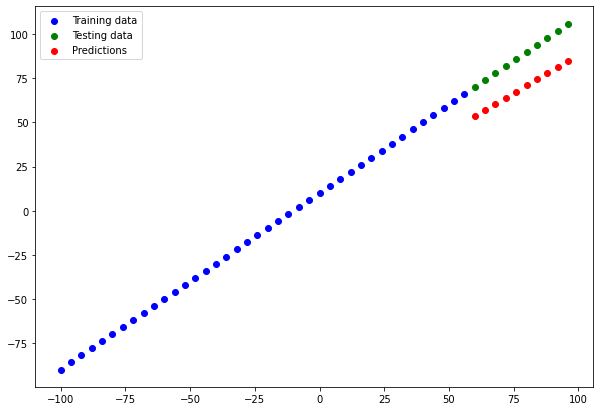

In [40]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [41]:
#Calculate model_1 evaluation metrics

mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

### Building model 2

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mse: 777.9202
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 29.8935 - mse: 1334.8954
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4055 - mse: 1106.8037
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mse: 281.1078
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 40.4763 - mse: 2586.0093
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mse: 1094.4384
Epoch 11/100
2/2 [==========================

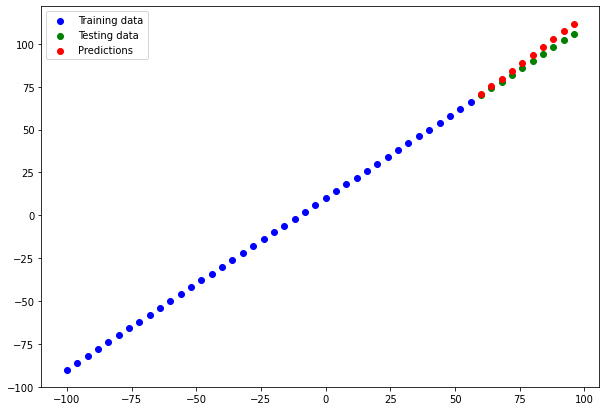

In [43]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [44]:
#Calculate model_1 evaluation metrics

mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969733>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070361>)

### Build model 3

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mse: 777.9202
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 29.8935 - mse: 1334.8954
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 27.4055 - mse: 1106.8037
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mse: 281.1078
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mse: 2586.0093
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 27.8688 - mse: 1094.4384
Epoch 11/500
2/2 [==========================

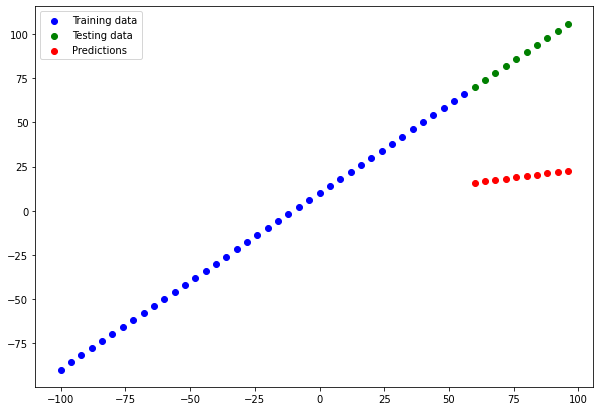

In [46]:
# Make and plot predictions for model_1
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [47]:
#Calculate model_1 evaluation metrics

mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.029>)

## Comparing the results of our experiments

In [48]:
# Let's compare our model's results using a pandas Dataframe

import pandas as pd

model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model','mae','mse'])
all_results


,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196973,13.070361
2,model_3,68.713623,4808.028809


In [49]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Looks like `model_2` performs best

## Tracking your experiments

Can be tedious when running lots of experiments 

Tools to help ease the task:

* TensorBoard - Helps tracking ML experiments
* Weights and Biases - Tool for tracking all kinds of ML experiments (integrates into TensorBoard)

## Saving our models

There are two main formats to save models:

1. SavedModel
2. HDF5

In [50]:
# Saving in SavedModel format
model_2.save('.\\saved_models\\01_saved_bestmodel')

INFO:tensorflow:Assets written to: .\saved_models\01_saved_bestmodel\assets


In [51]:
# Saving in HDF5 format
model_2.save('.\\saved_models\\01_saved_bestmodel_HDF5.h5')

## Loading a saved model

In [52]:
# Loading models to check if they saved correctly
#SavedModel format
loaded_SavedModel_Format = tf.keras.models.load_model('.\\saved_models\\01_saved_bestmodel')
loaded_SavedModel_Format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compare model_2 predictions with the loaded model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_Format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [54]:
# Load in the .h5 model

loaded_h5_model = tf.keras.models.load_model('.\\saved_models\\01_saved_bestmodel_HDF5.h5')
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compare model_2 predictions with the loaded model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_format_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [109]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
# One-hot encoding our dataframe
insurance_one_hot = pd.get_dummies(insurance,drop_first=True)
insurance_one_hot

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [111]:
# Create X and y values

X = insurance_one_hot.drop('charges',axis = 1)
y = insurance_one_hot['charges']
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [112]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [113]:
# Creating training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
len(X),len(X_train),len(X_test)


(1338, 1070, 268)

In [114]:
# Build a neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8622.7656 - mae: 8622.7656
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7888.7065 - mae: 7888.7065
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7609.7407 - mae: 7609.7407
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7788.2974 - mae: 7788.2974
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7665.2529 - mae: 7665.2529
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7662.0396 - mae: 7662.0396
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7577.1016 - mae: 7577.1016
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7825.6167 - mae: 7825.6167
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7464.4761 - mae: 7464.4761
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7727.0820 - mae: 7727.0820

In [115]:
# Check the results of the model on the test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7999.9683 - mae: 7999.9683


[7999.96826171875, 7999.96826171875]

The model results are not great, let's improve it

First try -> add an extra layer with more hidden units and use Adam optimizer
Second try -> train for longer

In [116]:
# Build a neural network
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=['mae'])

insurance_model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13106.1064 - mae: 13106.1064
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12074.5020 - mae: 12074.5020
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10943.2754 - mae: 10943.2754
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9497.8955 - mae: 9497.8955
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8163.3457 - mae: 8163.3457
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.0981 - mae: 7514.0981
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7387.0771 - mae:

In [117]:
# Check the results of the larger model on the test data

insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6003.9663 - mae: 6003.9663


[6003.96630859375, 6003.96630859375]

In [130]:
# Build a neural network
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model_3.fit(X_train,y_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13106.1064 - mae: 13106.1064
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12074.5020 - mae: 12074.5020
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10943.2754 - mae: 10943.2754
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9497.8955 - mae: 9497.8955
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8163.3457 - mae: 8163.3457
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7514.0981 - mae: 7514.0981
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7387.0771 - mae:

In [131]:
# Check the results of the larger model on the test data

insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3443.8218 - mae: 3443.8218


[3443.82177734375, 3443.82177734375]

Text(0.5, 0, 'epochs')

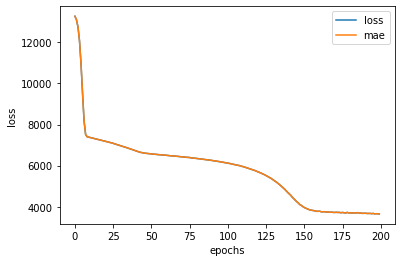

In [132]:
# Plot history, also known as loss or training curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data (Normalization and Standardization)

Neural networks tend to prefer normalization
- Possible to test both and compare

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [182]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer((MinMaxScaler(),['age','bmi','children']),
(OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']))

# Create X and y
X = insurance.drop('charges',axis = 1)
y = insurance['charges']

# Create train and test sets

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data

ct.fit(X_train)

# Transform training and test data with scaler anf OHencoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [183]:
# Visualizing new data
X_train.loc[0],X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [184]:
X_train.shape, X_train_normal.shape #More columns added by OneHotEncoder

((1070, 6), (1070, 11))

Test the new normalized data on a new model

In [195]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)                                        
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13341.7871 - mae: 13341.7871
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13292.3311 - mae: 13292.3311
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12972.4424 - mae: 12972.4424
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11748.6846 - mae: 11748.6846
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9422.4189 - mae: 9422.4189
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8010.7769 - mae: 8010.7769
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7793.6538 - mae: 7793.6538
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7620.0444 - mae: 7620.0444
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7445.6055 - mae: 7445.6055
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7252.0122 - mae: 7

In [196]:
# Evalaute our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3160.3088 - mae: 3160.3088


[3160.308837890625, 3160.308837890625]